Net Rating (NRTG): Difference between ORTG and DRTG, which gives an overall indication of team performance.
Effective Field Goal Percentage (EFG%): Adjusts for the fact that a 3-point field goal is worth more than a 2-point field goal.
True Shooting Percentage (TS%): A measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.
Pace: An estimate of the number of possessions per 48 minutes by a team.
Turnover Rate (TOV%): An estimate of turnovers committed per 100 plays.
Rebound Rate (REB%): The percentage of missed shots that a team rebounds.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import leaguedashteamstats

In [ ]:
# Fetch team statistics for the 2022-23 season
team_stats = leaguedashteamstats.LeagueDashTeamStats(season='2023-24', measure_type_detailed_defense='Advanced')

In [10]:
# Convert the data to a DataFrame
team_stats_df = team_stats.get_data_frames()[0]

# Print column names to find the right identifiers for Turnover Rate and Pace
print(team_stats_df.columns)

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK'],
      dtype='object')


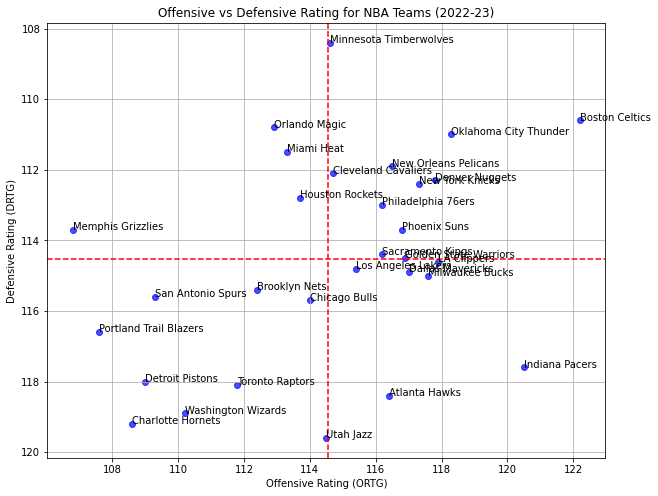

In [4]:


# Convert the data to a DataFrame
team_stats_df = team_stats.get_data_frames()[0]

# Filter for Offensive and Defensive Ratings
team_stats_filtered = team_stats_df[['TEAM_NAME', 'OFF_RATING', 'DEF_RATING']]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(team_stats_filtered['OFF_RATING'], team_stats_filtered['DEF_RATING'], alpha=0.7, c='blue')
plt.title('Offensive vs Defensive Rating for NBA Teams (2022-23)')
plt.xlabel('Offensive Rating (ORTG)')
plt.ylabel('Defensive Rating (DRTG)')
plt.grid(True)
plt.axhline(y=team_stats_filtered['DEF_RATING'].mean(), color='r', linestyle='--')
plt.axvline(x=team_stats_filtered['OFF_RATING'].mean(), color='r', linestyle='--')
plt.gca().invert_yaxis()  # Invert the y-axis

# Annotate each point with the team name
for i, txt in enumerate(team_stats_filtered['TEAM_NAME']):
    plt.annotate(txt, (team_stats_filtered['OFF_RATING'].iat[i], team_stats_filtered['DEF_RATING'].iat[i]))

plt.show()

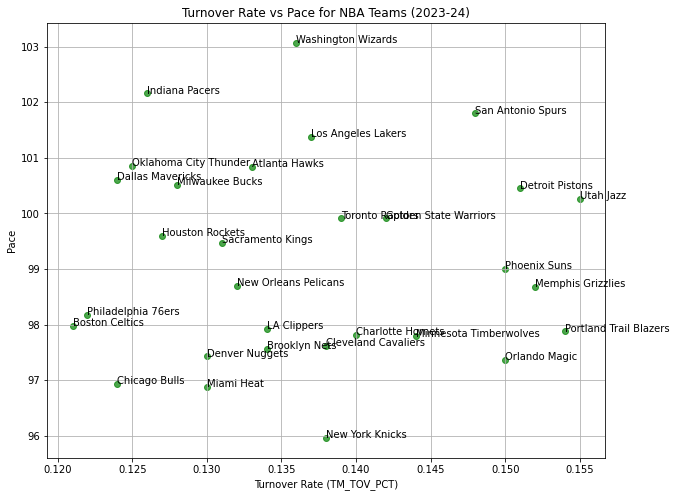

In [11]:
# Filter for Turnover Rate and Pace
team_stats_filtered = team_stats_df[['TEAM_NAME', 'TM_TOV_PCT', 'PACE']]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(team_stats_filtered['TM_TOV_PCT'], team_stats_filtered['PACE'], alpha=0.7, c='green')
plt.title('Turnover Rate vs Pace for NBA Teams (2023-24)')
plt.xlabel('Turnover Rate (TM_TOV_PCT)')
plt.ylabel('Pace')
plt.grid(True)

# Annotate each point with the team name
for i, txt in enumerate(team_stats_filtered['TEAM_NAME']):
    plt.annotate(txt, (team_stats_filtered['TM_TOV_PCT'].iat[i], team_stats_filtered['PACE'].iat[i]))

plt.show()
plt.show()

In [13]:
team_stats_filtered.columns

Index(['TEAM_NAME', 'TM_TOV_PCT', 'PACE'], dtype='object')

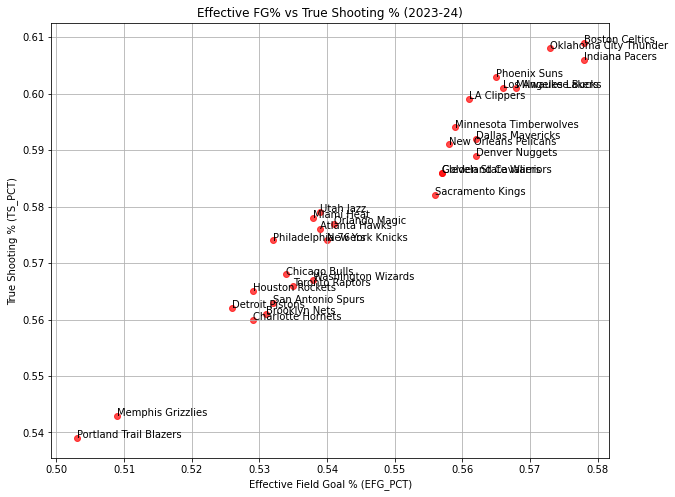

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(team_stats_df['EFG_PCT'], team_stats_df['TS_PCT'], alpha=0.7, c='red')
plt.title('Effective FG% vs True Shooting % (2023-24)')
plt.xlabel('Effective Field Goal % (EFG_PCT)')
plt.ylabel('True Shooting % (TS_PCT)')
plt.grid(True)
for i, txt in enumerate(team_stats_df['TEAM_NAME']):
    plt.annotate(txt, (team_stats_df['EFG_PCT'].iat[i], team_stats_df['TS_PCT'].iat[i]))
plt.show()

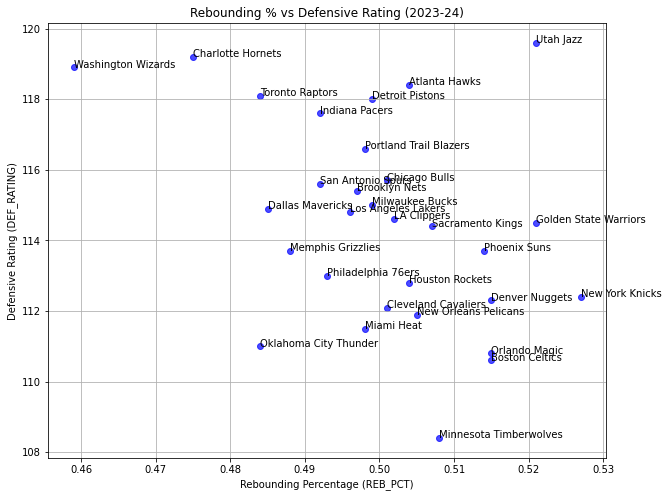

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(team_stats_df['REB_PCT'], team_stats_df['DEF_RATING'], alpha=0.7, c='blue')
plt.title('Rebounding % vs Defensive Rating (2023-24)')
plt.xlabel('Rebounding Percentage (REB_PCT)')
plt.ylabel('Defensive Rating (DEF_RATING)')
plt.grid(True)
for i, txt in enumerate(team_stats_df['TEAM_NAME']):
    plt.annotate(txt, (team_stats_df['REB_PCT'].iat[i], team_stats_df['DEF_RATING'].iat[i]))
plt.show()

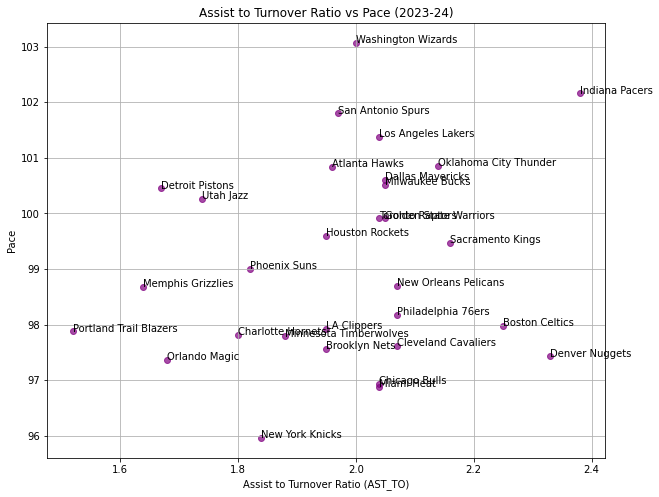

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(team_stats_df['AST_TO'], team_stats_df['PACE'], alpha=0.7, c='purple')
plt.title('Assist to Turnover Ratio vs Pace (2023-24)')
plt.xlabel('Assist to Turnover Ratio (AST_TO)')
plt.ylabel('Pace')
plt.grid(True)
for i, txt in enumerate(team_stats_df['TEAM_NAME']):
    plt.annotate(txt, (team_stats_df['AST_TO'].iat[i], team_stats_df['PACE'].iat[i]))
plt.show()

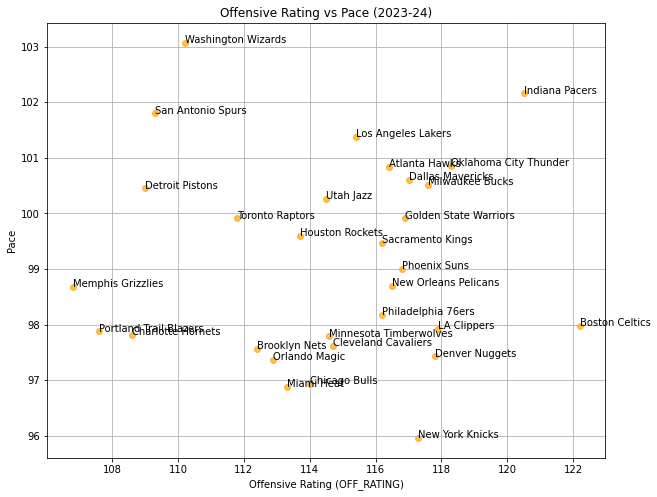

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(team_stats_df['OFF_RATING'], team_stats_df['PACE'], alpha=0.7, c='orange')
plt.title('Offensive Rating vs Pace (2023-24)')
plt.xlabel('Offensive Rating (OFF_RATING)')
plt.ylabel('Pace')
plt.grid(True)
for i, txt in enumerate(team_stats_df['TEAM_NAME']):
    plt.annotate(txt, (team_stats_df['OFF_RATING'].iat[i], team_stats_df['PACE'].iat[i]))
plt.show()

In [19]:
championships = [
    {"team_id": "1610612738", "year": "1980-81"},  # Boston Celtics
    {"team_id": "1610612747", "year": "1981-82"},  # Los Angeles Lakers
    {"team_id": "1610612747", "year": "1984-85"},  # Los Angeles Lakers
    {"team_id": "1610612738", "year": "1985-86"},  # Boston Celtics
    {"team_id": "1610612747", "year": "1986-87"},  # Los Angeles Lakers
    {"team_id": "1610612747", "year": "1987-88"},  # Los Angeles Lakers
    {"team_id": "1610612765", "year": "1988-89"},  # Detroit Pistons
    {"team_id": "1610612765", "year": "1989-90"},  # Detroit Pistons
    {"team_id": "1610612741", "year": "1990-91"},  # Chicago Bulls
    {"team_id": "1610612741", "year": "1991-92"},  # Chicago Bulls
    {"team_id": "1610612741", "year": "1992-93"},  # Chicago Bulls
    {"team_id": "1610612745", "year": "1993-94"},  # Houston Rockets
    {"team_id": "1610612745", "year": "1994-95"},  # Houston Rockets
    {"team_id": "1610612741", "year": "1995-96"},  # Chicago Bulls
    {"team_id": "1610612741", "year": "1996-97"},  # Chicago Bulls
    {"team_id": "1610612741", "year": "1997-98"},  # Chicago Bulls
    {"team_id": "1610612759", "year": "1998-99"},  # San Antonio Spurs
    {"team_id": "1610612747", "year": "1999-00"},  # Los Angeles Lakers
    {"team_id": "1610612747", "year": "2000-01"},  # Los Angeles Lakers
    {"team_id": "1610612747", "year": "2001-02"},  # Los Angeles Lakers
    {"team_id": "1610612759", "year": "2002-03"},  # San Antonio Spurs
    {"team_id": "1610612765", "year": "2003-04"},  # Detroit Pistons
    {"team_id": "1610612759", "year": "2004-05"},  # San Antonio Spurs
    {"team_id": "1610612748", "year": "2005-06"},  # Miami Heat
    {"team_id": "1610612759", "year": "2006-07"},  # San Antonio Spurs
    {"team_id": "1610612738", "year": "2007-08"},  # Boston Celtics
    {"team_id": "1610612747", "year": "2008-09"},  # Los Angeles Lakers
    {"team_id": "1610612747", "year": "2009-10"},  # Los Angeles Lakers
    {"team_id": "1610612742", "year": "2010-11"},  # Dallas Mavericks
    {"team_id": "1610612748", "year": "2011-12"},  # Miami Heat
    {"team_id": "1610612748", "year": "2012-13"},  # Miami Heat
    {"team_id": "1610612759", "year": "2013-14"},  # San Antonio Spurs
    {"team_id": "1610612744", "year": "2014-15"},  # Golden State Warriors
    {"team_id": "1610612739", "year": "2015-16"},  # Cleveland Cavaliers
    {"team_id": "1610612744", "year": "2016-17"},  # Golden State Warriors
    {"team_id": "1610612744", "year": "2017-18"},  # Golden State Warriors
    {"team_id": "1610612761", "year": "2018-19"},  # Toronto Raptors
    {"team_id": "1610612747", "year": "2019-20"},  # Los Angeles Lakers
    {"team_id": "1610612749", "year": "2020-21"},  # Milwaukee Bucks
    {"team_id": "1610612744", "year": "2021-22"},  # Golden State Warriors
]

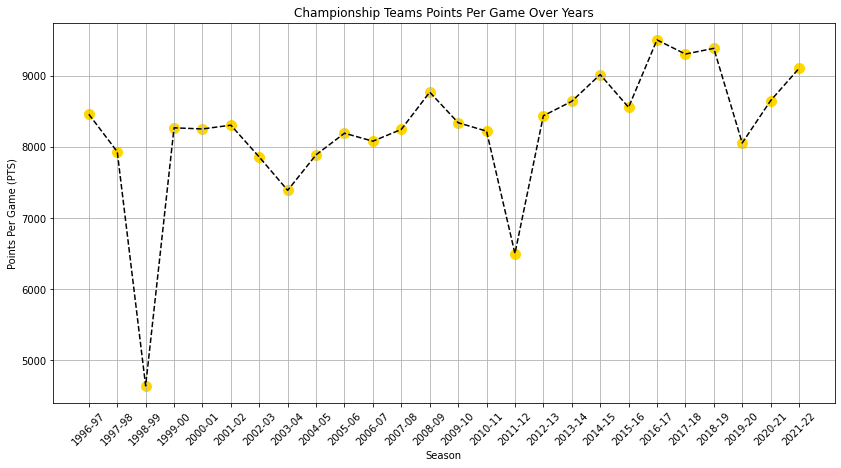

In [21]:
# Container for team stats
champion_stats = []

# Fetch data for each championship team and year
for champion in championships:
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=champion["year"],
        team_id_nullable=champion["team_id"],
        measure_type_detailed_defense='Base'
    )
    df = stats.get_data_frames()[0]
    df['Year'] = champion["year"]  # Add the championship year for plotting
    champion_stats.append(df)

# Combine all data into a single DataFrame
all_champions_df = pd.concat(champion_stats, ignore_index=True)

# Assuming we want to plot Points Per Game over the years
plt.figure(figsize=(14, 7))
plt.scatter(all_champions_df['Year'], all_champions_df['PTS'], color='gold', s=100)
plt.plot(all_champions_df['Year'], all_champions_df['PTS'], linestyle='--', color='black')
plt.title('Championship Teams Points Per Game Over Years')
plt.xlabel('Season')
plt.ylabel('Points Per Game (PTS)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

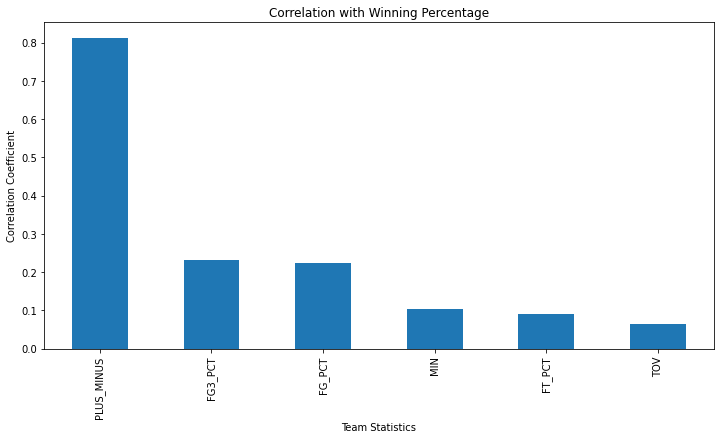

Summary Statistics for Championship Teams:
           W_PCT          MIN     FG_PCT    FG3_PCT     FT_PCT          TOV  \
count  26.000000    26.000000  26.000000  26.000000  26.000000    26.000000   
mean    0.730846  3830.532051   0.470962   0.363154   0.749885  1135.807692   
std     0.060157   349.700443   0.015335   0.021767   0.034673   106.928394   
min     0.634000  2415.000000   0.435000   0.323000   0.683000   759.000000   
25%     0.695000  3946.000000   0.460250   0.346000   0.726000  1104.500000   
50%     0.713500  3956.000000   0.473500   0.362500   0.753500  1144.000000   
75%     0.783750  3964.750000   0.478000   0.381000   0.770750  1185.750000   
max     0.841000  3981.000000   0.503000   0.398000   0.815000  1295.000000   

       PLUS_MINUS  
count   26.000000  
mean   555.115385  
std    181.648744  
min    277.000000  
25%    414.250000  
50%    495.500000  
75%    643.750000  
max    954.000000  


In [24]:


# Assuming 'all_champions_df' is already loaded and contains championship team data

# Filter out non-numerical columns for correlation analysis
numerical_df = all_champions_df.select_dtypes(include=[np.number])

# Calculate summary statistics for numerical data
summary_stats = numerical_df.describe()

# Calculate correlations within the numerical data
correlation_matrix = numerical_df.corr()

# Focus on correlation of features with Winning Percentage (W_PCT), if 'W_PCT' exists
if 'W_PCT' in correlation_matrix:
    w_pct_correlations = correlation_matrix['W_PCT'].sort_values(ascending=False)

    # Plot correlations of W_PCT with other features
    w_pct_correlations.drop('W_PCT', errors='ignore').plot(kind='bar', figsize=(12, 6), title='Correlation with Winning Percentage')
    plt.xlabel('Team Statistics')
    plt.ylabel('Correlation Coefficient')
    plt.show()

# Example visualization: Points Per Game vs Winning Percentage
# Check if 'PTS' and 'W_PCT' are in the DataFrame before plotting
if 'PTS' in numerical_df.columns and 'W_PCT' in numerical_df.columns:
    plt.scatter(numerical_df['PTS'], numerical_df['W_PCT'])
    plt.title('Points Per Game vs. Winning Percentage among Championship Teams')
    plt.xlabel('Points Per Game (PTS)')
    plt.ylabel('Winning Percentage (W_PCT)')
    plt.grid(True)
    plt.show()

# Display summary statistics to console
print("Summary Statistics for Championship Teams:")
print(summary_stats)


# Playoffs

In [3]:
from nba_api.stats.static import players

def get_player_id(player_name):
    # Get the list of all players
    nba_players = players.get_players()
    
    # Find the player with the matching name
    player = next((p for p in nba_players if p['full_name'].lower() == player_name.lower()), None)
    
    if player:
        return player['id']
    else:
        return None

# Example usage
player_name = "Michael Jordan"
player_id = get_player_id(player_name)

if player_id:
    print(f"The player ID for {player_name} is: {player_id}")
else:
    print(f"Player not found: {player_name}")

The player ID for Michael Jordan is: 893


In [5]:
from nba_api.stats.endpoints import PlayerGameLog

def get_player_playoff_games(player_id):
    game_log = PlayerGameLog(player_id=player_id, season_type_all_star='Playoffs')
    game_log_df = game_log.get_data_frames()[0]  # Get the game log DataFrame
    return game_log_df

# Anthony Edwards' player ID
anthony_edwards_id = 1630162

# Michael Jordan's player ID
michael_jordan_id = 893

# Get Anthony Edwards' playoff game log
anthony_edwards_games = get_player_playoff_games(anthony_edwards_id)
print("Anthony Edwards' Playoff Games:")
print(anthony_edwards_games)

# Get Michael Jordan's playoff game log
michael_jordan_games = get_player_playoff_games(michael_jordan_id)
print("\nMichael Jordan's Playoff Games:")
print(michael_jordan_games)

Anthony Edwards' Playoff Games:
   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      42023    1630162  0042300311  MAY 22, 2024  MIN vs. DAL  L   41    6   
1      42023    1630162  0042300237  MAY 19, 2024    MIN @ DEN  W   44    6   
2      42023    1630162  0042300236  MAY 16, 2024  MIN vs. DEN  W   34    8   
3      42023    1630162  0042300235  MAY 14, 2024    MIN @ DEN  L   44    5   
4      42023    1630162  0042300234  MAY 12, 2024  MIN vs. DEN  L   45   16   
5      42023    1630162  0042300233  MAY 10, 2024  MIN vs. DEN  L   37    8   
6      42023    1630162  0042300232  MAY 06, 2024    MIN @ DEN  W   37   11   
7      42023    1630162  0042300231  MAY 04, 2024    MIN @ DEN  W   42   17   
8      42023    1630162  0042300164  APR 28, 2024    MIN @ PHX  W   41   13   
9      42023    1630162  0042300163  APR 26, 2024    MIN @ PHX  W   43   12   
10     42023    1630162  0042300162  APR 23, 2024  MIN vs. PHX  W   38    3   
11     42023    1630

In [8]:
anthony_edwards_games

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,42023,1630162,0042300311,"MAY 22, 2024",MIN vs. DAL,L,41,6,16,0.375,...,9,11,8,2,0,3,1,19,-1,1
1,42023,1630162,0042300237,"MAY 19, 2024",MIN @ DEN,W,44,6,24,0.250,...,8,8,7,2,0,1,2,16,11,1
2,42023,1630162,0042300236,"MAY 16, 2024",MIN vs. DEN,W,34,8,17,0.471,...,4,4,4,3,0,1,2,27,43,1
3,42023,1630162,0042300235,"MAY 14, 2024",MIN @ DEN,L,44,5,15,0.333,...,4,4,9,1,0,4,2,18,-12,1
4,42023,1630162,0042300234,"MAY 12, 2024",MIN vs. DEN,L,45,16,25,0.640,...,5,5,5,2,1,3,2,44,5,1
5,42023,1630162,0042300233,"MAY 10, 2024",MIN vs. DEN,L,37,8,15,0.533,...,6,6,5,0,1,5,3,19,-32,1
6,42023,1630162,0042300232,"MAY 06, 2024",MIN @ DEN,W,37,11,17,0.647,...,2,2,7,2,0,4,2,27,18,1
7,42023,1630162,0042300231,"MAY 04, 2024",MIN @ DEN,W,42,17,29,0.586,...,5,7,3,1,2,1,1,43,10,1
8,42023,1630162,0042300164,"APR 28, 2024",MIN @ PHX,W,41,13,23,0.565,...,5,9,6,1,2,2,2,40,7,1
9,42023,1630162,0042300163,"APR 26, 2024",MIN @ PHX,W,43,12,23,0.522,...,7,9,5,2,0,5,1,36,19,1


In [12]:
import pandas as pd

In [13]:
from nba_api.stats.endpoints import PlayerGameLog, CommonTeamRoster
from nba_api.stats.static import teams

def get_team_playoff_games(team_name, season):
    # Get the team ID based on the team name
    team_id = teams.find_teams_by_full_name(team_name)[0]['id']
    
    # Get the list of players for the specified team and season
    team_players = CommonTeamRoster(team_id=team_id, season=season).get_data_frames()[0]
    player_ids = team_players['PLAYER_ID'].tolist()
    
    # Create an empty list to store the game logs
    game_logs = []
    
    # Retrieve the game log for each player
    for player_id in player_ids:
        game_log = PlayerGameLog(player_id=player_id, season=season, season_type_all_star='Playoffs').get_data_frames()[0]
        game_logs.append(game_log)
    
    # Concatenate the game logs into a single DataFrame
    team_playoff_games = pd.concat(game_logs, ignore_index=True)
    
    return team_playoff_games

# Example usage
team_name = "Minnesota Timberwolves"
season = "2023-24"  # Specify the current season

timberwolves_playoff_games = get_team_playoff_games(team_name, season)
print(timberwolves_playoff_games)

    SEASON_ID Player_ID     Game_ID     GAME_DATE      MATCHUP WL MIN FGM FGA  \
0       42023    203937  0042300311  MAY 22, 2024  MIN vs. DAL  L  17   5   8   
1       42023    203937  0042300237  MAY 19, 2024    MIN @ DEN  W   4   0   1   
2       42023    203937  0042300236  MAY 16, 2024  MIN vs. DEN  W  11   0   2   
3       42023    203937  0042300235  MAY 14, 2024    MIN @ DEN  L  16   1   2   
4       42023    203937  0042300234  MAY 12, 2024  MIN vs. DEN  L   6   0   1   
..        ...       ...         ...           ...          ... ..  ..  ..  ..   
121     42023   1630568  0042300233  MAY 10, 2024  MIN vs. DEN  L   6   2   2   
122     42023   1630568  0042300232  MAY 06, 2024    MIN @ DEN  W   3   1   2   
123     42023   1630568  0042300163  APR 26, 2024    MIN @ PHX  W   0   0   0   
124     42023   1630568  0042300162  APR 23, 2024  MIN vs. PHX  W   2   0   0   
125     42023   1630568  0042300161  APR 20, 2024  MIN vs. PHX  W   3   2   2   

     FG_PCT  ... DREB REB  

In [14]:
timberwolves_playoff_games.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# Add a column with player names
def get_player_name(player_id):
    player = players.find_player_by_id(player_id)
    return player['full_name'] if player else 'Unknown'

timberwolves_playoff_games['PLAYER_NAME'] = timberwolves_playoff_games['Player_ID'].apply(get_player_name)

# Prepare the data for analysis
X = timberwolves_playoff_games[['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']]
y = timberwolves_playoff_games['WL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get the feature importances
importances = rf_classifier.feature_importances_

# Create a dictionary to map feature names to their importances
feature_importances = dict(zip(X.columns, importances))

# Sort the features by their importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

Accuracy: 0.6923076923076923
Feature Importances:
PLUS_MINUS: 0.31562791043476957
MIN: 0.09221402369860264
FGA: 0.08471550674717093
PTS: 0.06917572156294241
REB: 0.05650740143707228
FGM: 0.04537913747085666
DREB: 0.04176050282365656
FG3A: 0.04174794605995154
FTM: 0.04080528778136134
FTA: 0.039557333463832514
AST: 0.037470331376304206
OREB: 0.0338593444199233
FG3M: 0.028406187192445434
PF: 0.023699560826127158
TOV: 0.023646306031356416
STL: 0.013293327467484975
BLK: 0.012134171206142196
